In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import defaultdict
%matplotlib inline

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = data[[1,4]].values
y = data['Species'].values

In [4]:
# Change our flowers to labels
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

In [5]:
# First, let us find our mu values
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class {}: {}\n'.format(cl, mean_vectors[cl]))

Mean Vector class 0: [ 5.006  0.246]

Mean Vector class 1: [ 5.936  1.326]

Mean Vector class 2: [ 6.588  2.026]



[array([ 5.006,  0.246]), array([ 5.936,  1.326]), array([ 6.588,  2.026])]
[ 5.006  0.246]
[ 5.936  1.326]
[ 6.588  2.026]


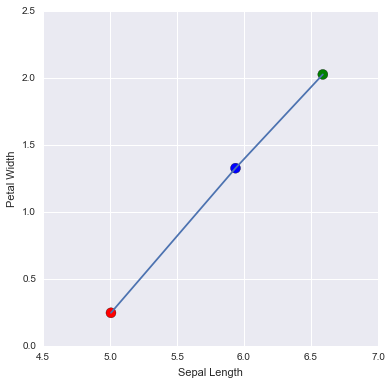

In [6]:
fig, axis = plt.subplots(figsize=(6,6))
print('{}'.format(mean_vectors[:]))
xTerm = []
yTerm = []
for points in mean_vectors:
    print(points)
    xTerm.append(points[0])
    yTerm.append(points[1])
plt.scatter(xTerm, yTerm, c =['red', 'blue', 'green'], s =100)
plt.plot(xTerm, yTerm)
axis.set_xlabel("Sepal Length")
axis.set_ylabel("Petal Width")

In [7]:
def discriminant_analysis(X, y, diago=False, alpha = 0.0):
    mu = {}
    prob_cl = {}
    cov = {}
    for label in np.unique(y):
        mu[label] = X[y==label].mean(axis=0)
        prob_cl[label] = (y==label).mean()
        term = X[y==label] - mu[label]
        cov[label] = term.T @ term /  (y==label).sum()
    if diago:
        cov = sum((y==label).sum() * cov[label] for label in np.unique(y))
        cov = cov / y.shape[0]
        cov = alpha*np.diag(np.diag(cov)) + (1-alpha)*cov
    
    return prob_cl, mu, cov
    
    
# print("mu is {}\n, pi is {}\n, cov is {}".format(mu, prob_cl, cov))

In [8]:
def normal_dist(X, mu, cov):
    # predict class probability
    term = X - mu
    n = (X.shape[0]/2)
    normalize = 1 / (np.power((2*np.pi), (n/2)) * np.sqrt(np.linalg.det(cov)))
    exponen = np.exp(- (term.T @ np.linalg.inv(cov) @ term) /2)
    return normalize * exponen


All we need to find is the argmax of the p(x|y) * p(y).
We know that the p(x|y) is given by the normal distribution.
p(y), however, is given by number samples in class x over all samples.

In [9]:
def results(X, prob_cl, mu, cov):
    prob = np.zeros((X.shape[0], len(prob_cl)))
    if type(cov) is not dict:
        # converts cov into a dict with the flowers as numbers to access the values
        idx = cov
        cov = defaultdict(lambda: idx)
    for i,x in enumerate(X):
        # i is sample #, x is the sepal length and petal width pair
        for j in range(len(prob_cl)):
            # obtain the proability of every single sample. p(x|y)*p(y)
            prob[i, j] = normal_dist(x, mu[j], cov[j]) * prob_cl[j]
        prob = prob / prob.sum(axis = 1)[:, np.newaxis]
    return prob



In [10]:
for alpha in np.linspace(0, 1, 0):
    prob_cl, mu, cov = discriminant_analysis(X, y, diago=False, alpha=alpha)
    highest_prob = (np.argmax(results(X, prob_cl, mu, cov), axis=1)==y).mean()
    print('regularization is is {}, highest prob is {},'.format(alpha, highest_prob))

In [16]:
probs = []
alphas = []
count = 0
for alpha in np.linspace(-10, 10, 100):
    prob_cl, mu, cov = discriminant_analysis(X, y, diago=True, alpha=alpha)
    alphas.append(alpha)
    highest_prob = (np.argmax(results(X, prob_cl, mu, cov), axis=1)==y).mean()
    probs.append(highest_prob)
    count +=1
    if count % 5 ==0:
        print('reg = {:0.2f}, highest_prob = {:0.3f},'.format(alpha, highest_prob))
        
## works for linera scales
    

reg = -9.19, highest_prob = 0.333,
reg = -8.18, highest_prob = 0.333,
reg = -7.17, highest_prob = 0.333,
reg = -6.16, highest_prob = 0.333,
reg = -5.15, highest_prob = 0.333,
reg = -4.14, highest_prob = 0.333,
reg = -3.13, highest_prob = 0.333,
reg = -2.12, highest_prob = 0.333,
reg = -1.11, highest_prob = 0.933,
reg = -0.10, highest_prob = 0.960,
reg = 0.91, highest_prob = 0.960,
reg = 1.92, highest_prob = 0.960,
reg = 2.93, highest_prob = 0.953,
reg = 3.94, highest_prob = 0.333,
reg = 4.95, highest_prob = 0.333,
reg = 5.96, highest_prob = 0.333,
reg = 6.97, highest_prob = 0.333,
reg = 7.98, highest_prob = 0.333,
reg = 8.99, highest_prob = 0.333,
reg = 10.00, highest_prob = 0.333,


In [21]:
probs = []
alphas = []
count = 0
for alpha in np.linspace(-10, 10, 100):
    prob_cl, mu, cov = discriminant_analysis(X, y, diago=False, alpha=alpha)
    alphas.append(alpha)
    highest_prob = (np.argmax(results(X, prob_cl, mu, cov), axis=1)==y).mean()
    probs.append(highest_prob)
    count +=1
    if count % 5 ==0:
        print('reg = {:0.2f}, highest_prob = {:0.3f},'.format(alpha, highest_prob))
        
# This occurs when we turn the linear discriminant analysis off and focus on Gaussian discriminant analysis

reg = -9.19, highest_prob = 0.967,
reg = -8.18, highest_prob = 0.967,
reg = -7.17, highest_prob = 0.967,
reg = -6.16, highest_prob = 0.967,
reg = -5.15, highest_prob = 0.967,
reg = -4.14, highest_prob = 0.967,
reg = -3.13, highest_prob = 0.967,
reg = -2.12, highest_prob = 0.967,
reg = -1.11, highest_prob = 0.967,
reg = -0.10, highest_prob = 0.967,
reg = 0.91, highest_prob = 0.967,
reg = 1.92, highest_prob = 0.967,
reg = 2.93, highest_prob = 0.967,
reg = 3.94, highest_prob = 0.967,
reg = 4.95, highest_prob = 0.967,
reg = 5.96, highest_prob = 0.967,
reg = 6.97, highest_prob = 0.967,
reg = 7.98, highest_prob = 0.967,
reg = 8.99, highest_prob = 0.967,
reg = 10.00, highest_prob = 0.967,


In [18]:
idx = (probs.index(max(probs)))
print("Hence, the highest value obtained is {} at value {}".format(
        max(probs), alphas[idx]))

Hence, the highest value obtained is 0.9666666666666667 at value -0.5050505050505052


## Our optimized lambda is -0.505 in this case with 97% accuracy.

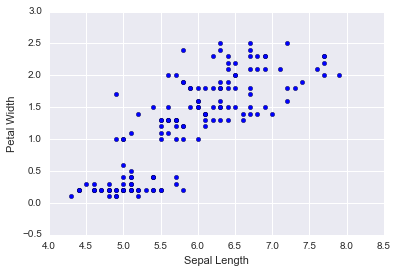

In [31]:
xTerm = []
yTerm = []
for points in X:
    xTerm.append(points[0])
    yTerm.append(points[1])
plt.scatter(xTerm, yTerm)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

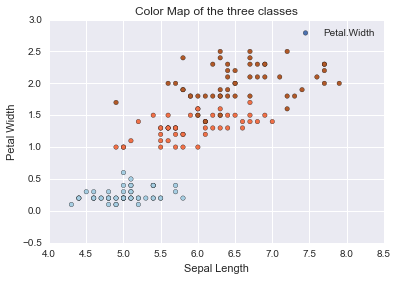

In [41]:
plt.scatter(data['Sepal.Length'], data['Petal.Width'],c=y,  cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title("Color Map of the three classes")
plt.legend()